In [1]:
import zipfile
import numpy as np 
from predict import predict
import sys
import io

from functions import raw_ocr, extract_png_page_bytes, get_results_from_ocr_dictionary

from pdf2image import convert_from_path
from PIL import Image, ImageDraw

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# with zipfile.ZipFile("data/xelix_data.zip", 'r') as zip_ref:
#     zip_ref.extractall("data/")

In [78]:
identifier = "0000230d-338a-40c2-a428-dd04a0516798"
# Store Pdf with convert_from_path function
from os.path import exists
images = convert_from_path("data/" + identifier + "/" + identifier + ".pdf")
 
for i in range(len(images)):
   
      # Save pages as images in the pdf
    images[i].save("data/" + identifier + "/page" + str(i) +'.jpg', 'JPEG')

In [79]:
extracted_image, image_width, image_height = extract_png_page_bytes("data/" + identifier + "/" + identifier + ".pdf", 0, 300)

Deprecation: 'getPNGData' removed from class 'Pixmap' after v1.19 - use 'tobytes'.


In [80]:
# Try to use 72 dpi + include time taken to shrink the image
# Shrink it from the 300

In [81]:
image = Image.open(io.BytesIO(extracted_image))
image.save("data/" + identifier + "/" + identifier + ".png")

In [92]:
table_mask = predict(
    image_path="data/" + identifier + "/" + identifier + ".png", 
    model_weights="best_model.ckpt"
)

In [100]:
table_1 = table_mask[1]
# table_2 = table_mask[1]
# table_3 = table_mask[3]

In [101]:
coords = np.column_stack(np.where(table_1 > 0))

In [102]:
X_coords = [x[0] for x in coords]
Y_coords = [x[1] for x in coords]

In [103]:
coords

array([[416,  16],
       [416,  17],
       [416,  18],
       ...,
       [631, 721],
       [631, 722],
       [631, 723]])

In [104]:
Y_0 = min(X_coords) * 2338/896
Y_1 = max(X_coords) * 2338/896
X_0 = min(Y_coords) * 1654/896
X_1 = max(Y_coords) * 1654/896

In [105]:
print(X_0)
print(Y_0)
# 128
# 16

29.535714285714285
1085.5


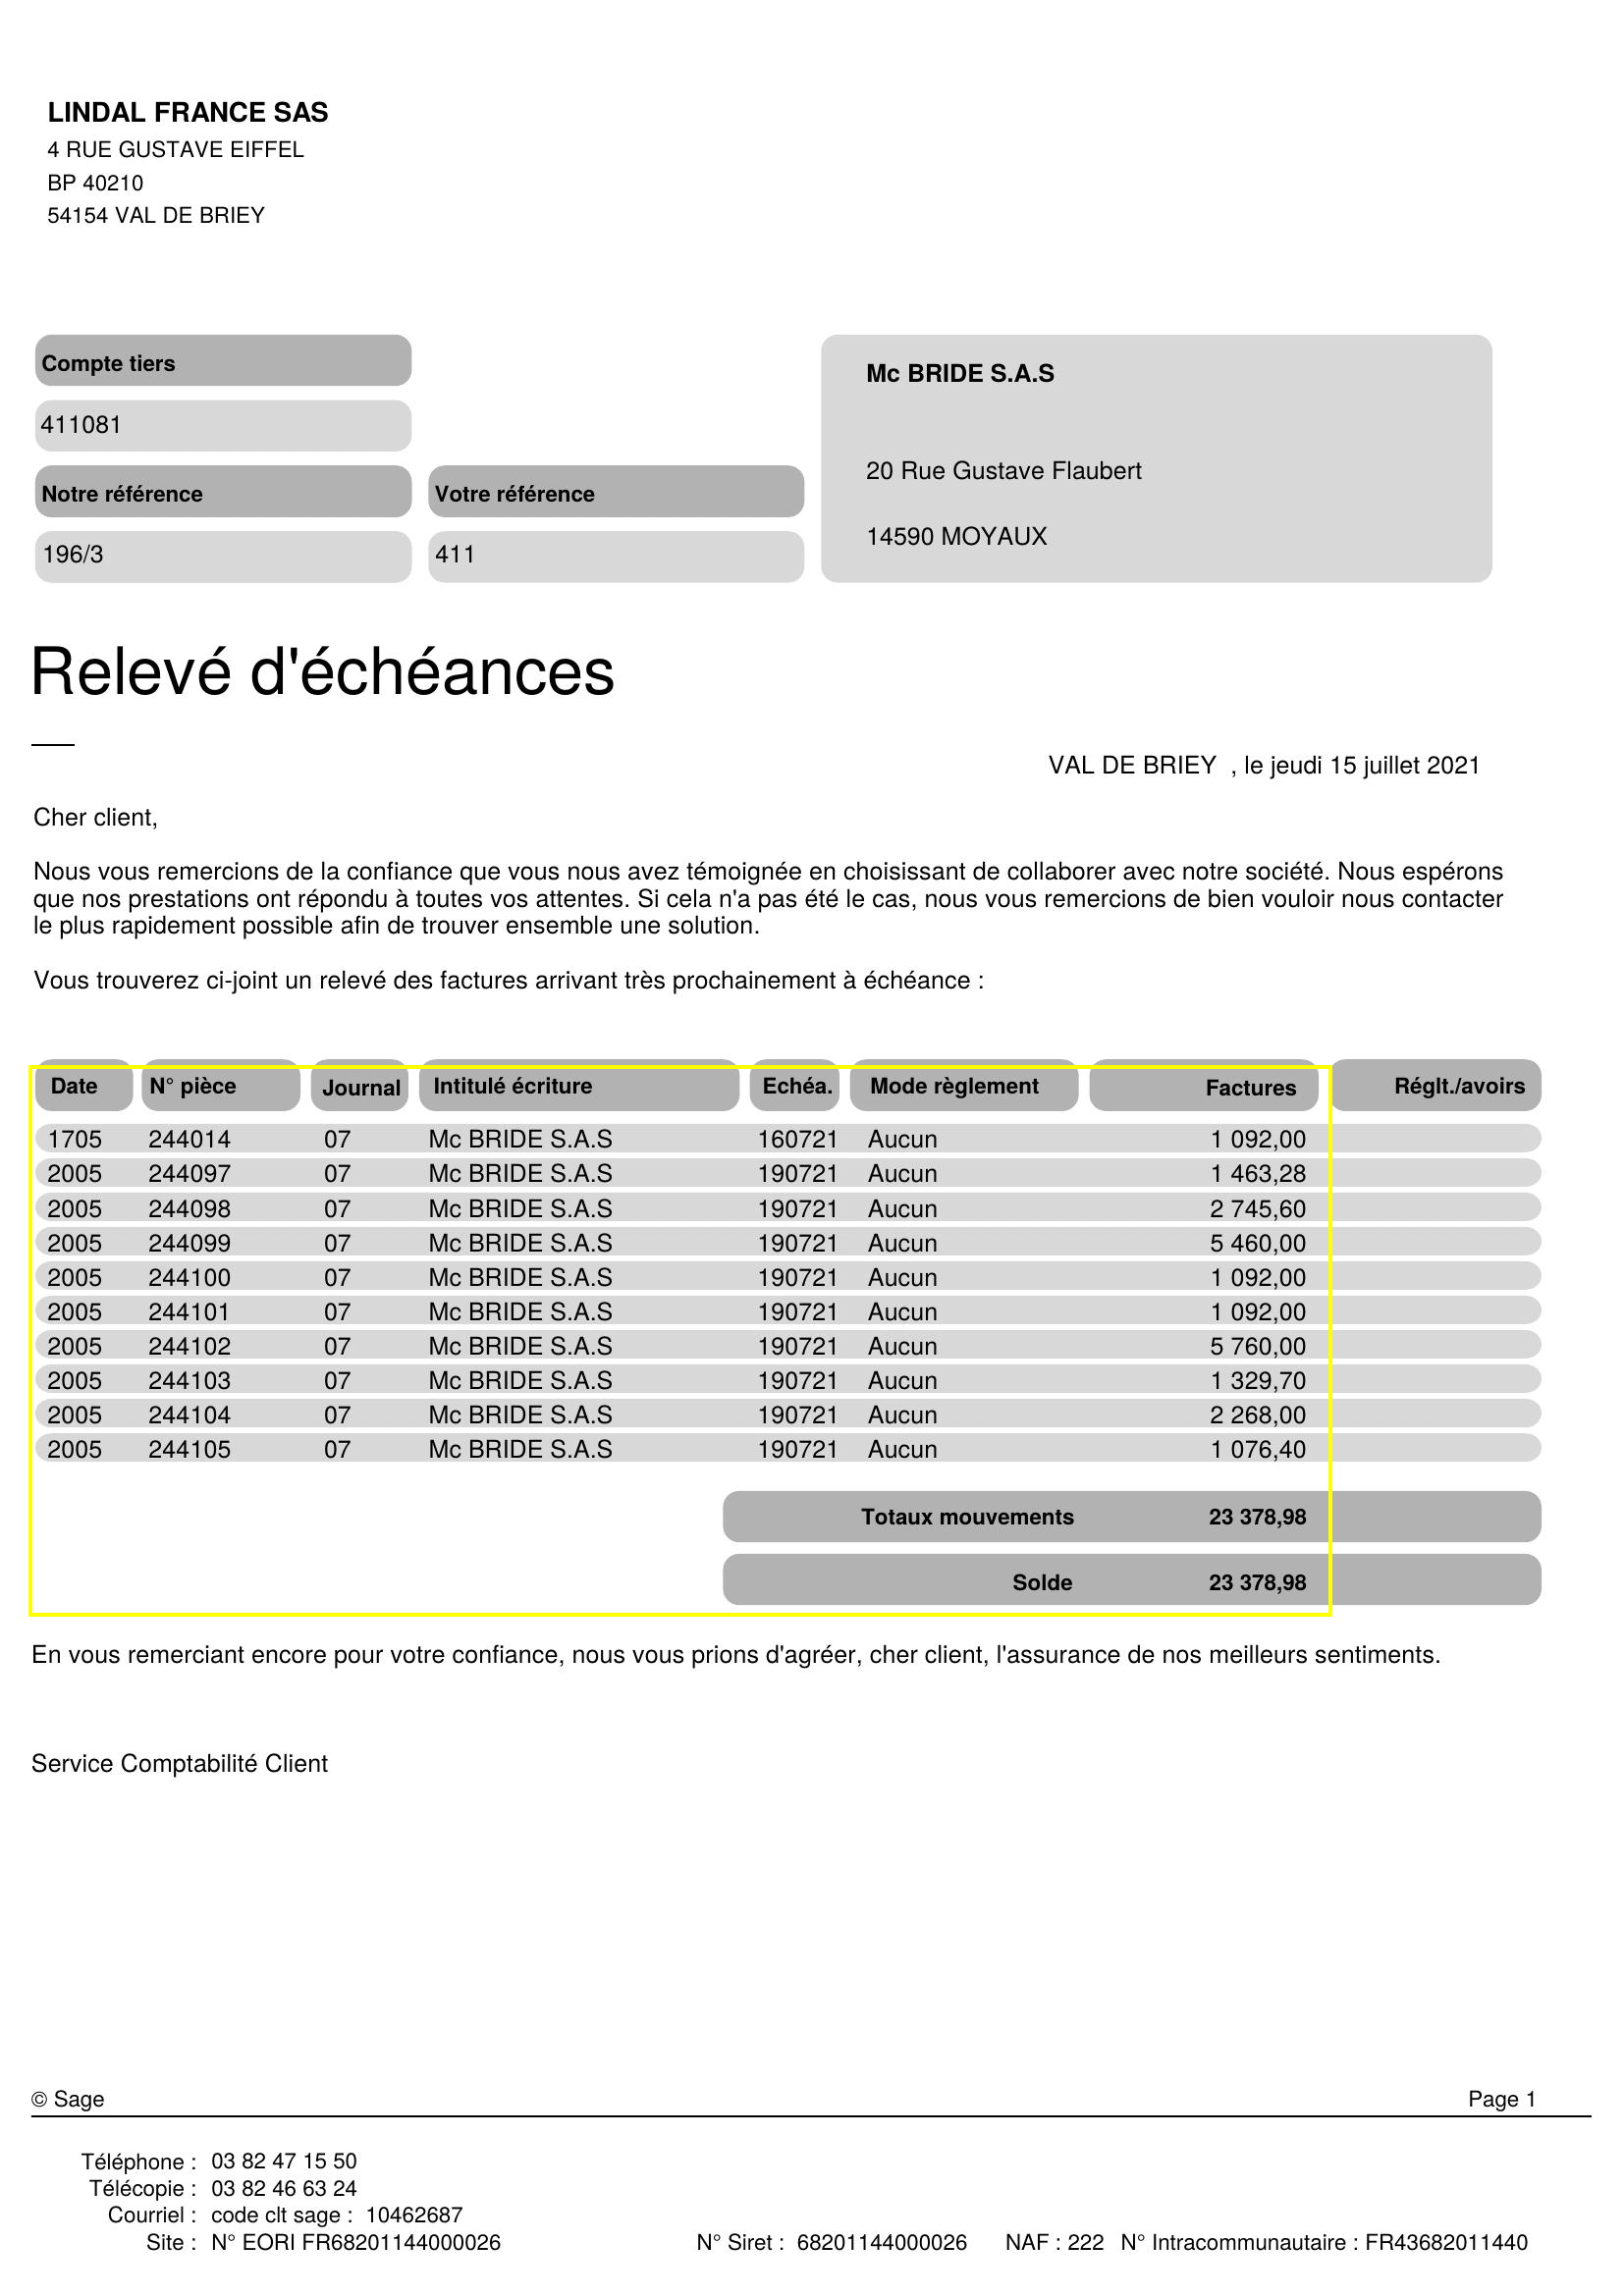

In [106]:
from PIL import Image, ImageDraw
OCR_shape = [X_0, Y_0, X_1, Y_1]

with Image.open("data/" + identifier + "/page0.jpg") as img:

    img1 = ImageDraw.Draw(img)  
    img1.rectangle(OCR_shape, outline ="yellow", width=4)
    display(img)